In [3]:
from collections import defaultdict
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [4]:
# Load data
folder_path = "../results/base/"
data = []

for root, dirs, files in os.walk(folder_path):
    for filename in files:
        if filename.endswith(".json"):
            file_path = os.path.join(root, filename)
            try:
                with open(file_path, "r") as f:
                    entry = json.load(f)
                    data.append(entry)
            except json.JSONDecodeError as e:
                print(f"Skipped invalid JSON: {file_path} ({e})")

print(f"Loaded {len(data)} valid JSON result files from '{folder_path}' and its subfolders.")

Loaded 4218 valid JSON result files from '../results/base/' and its subfolders.


In [17]:
# Replace this with your actual guess data
# Example dummy counts — you should fill in your real results here
model_names = ["gpt", "llama", "gemini", "claude", "qwen", "deepseek", "mistral"]

results = {model: {gm: 0 for gm in model_names} for model in model_names}

for entry in data:
    model_0 = entry["model_general_name_0"].lower()
    model_1 = entry["model_general_name_1"].lower()
    guess_0 = entry["agent_0_guess"].lower()
    guess_1 = entry["agent_1_guess"].lower()

    if guess_0 in model_names:
        results[model_0][guess_0] += 1
    else:
        results[model_0]["other"] += 1
    if guess_1 in model_names:
        results[model_1][guess_1] += 1
    else:
        results[model_1]["other"] += 1

# Convert to DataFrame
df = pd.DataFrame(results).T

# Reindex the DataFrame rows and columns
df = df.reindex(index=sorted(model_names), columns=sorted(model_names), fill_value=0)
df_percent = df.div(df.sum(axis=1), axis=0)

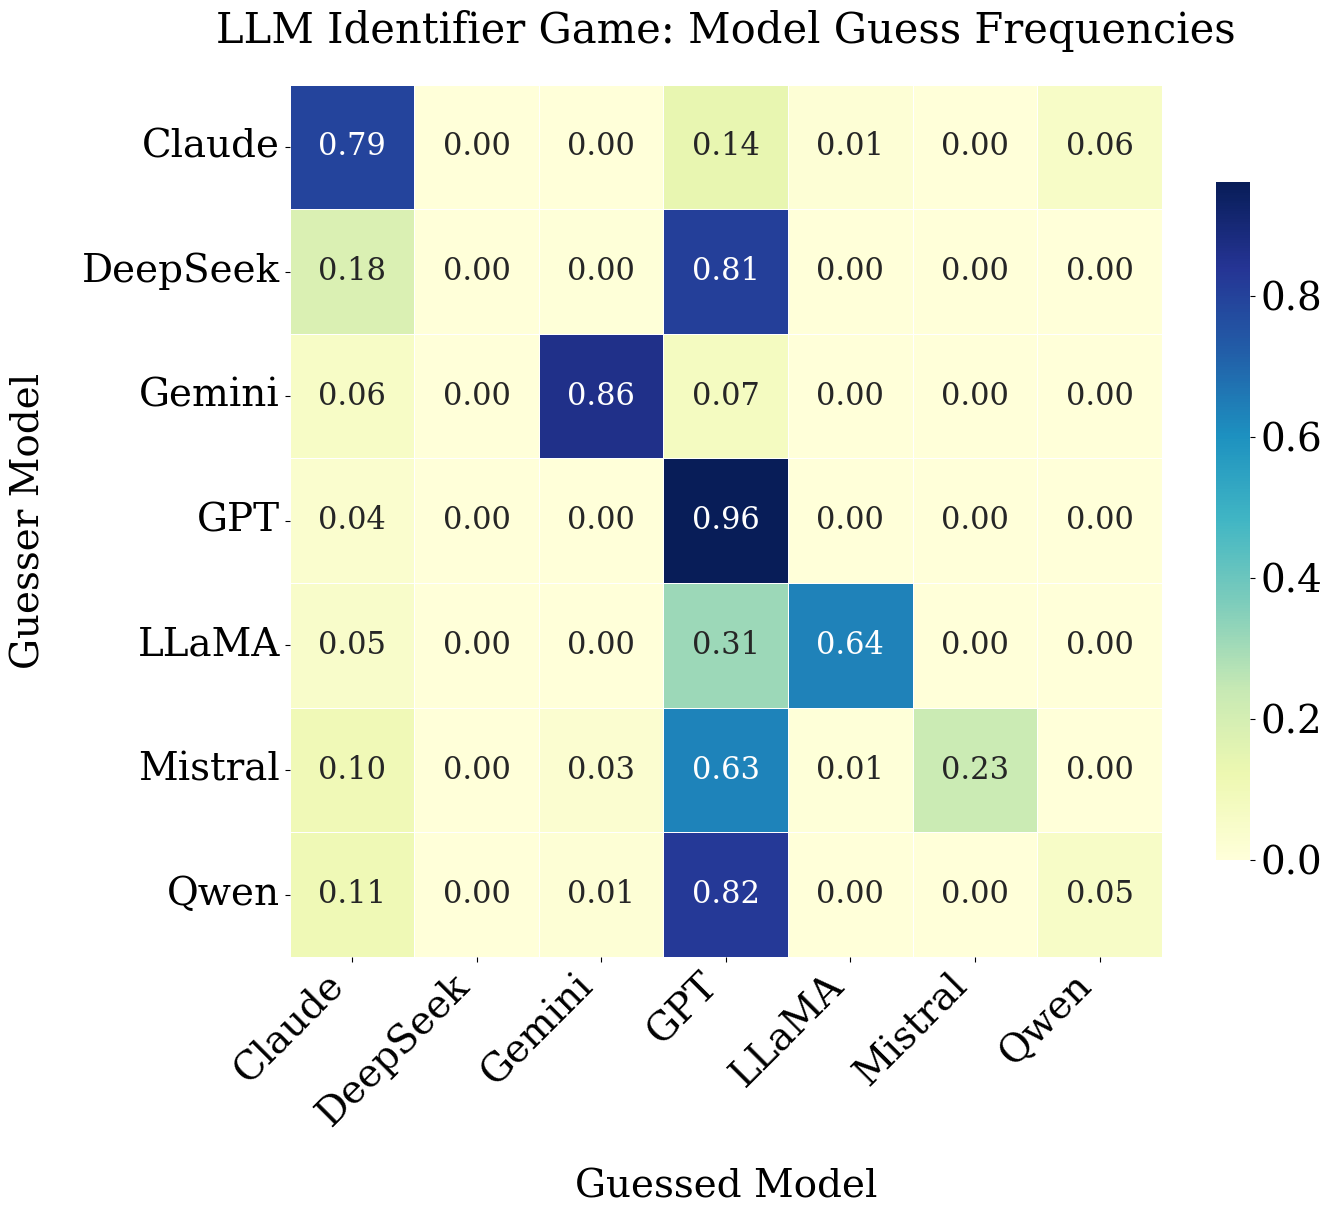

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Use serif font to match LaTeX
matplotlib.rcParams.update({"font.family": "serif"})

plt.figure(figsize=(14, 12))  # Adjust as needed

ax = sns.heatmap(
    df_percent,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
    square=True,
    annot_kws={"fontsize": 22}  # values inside cells
)

# Titles and axis labels
plt.title("LLM Identifier Game: Model Guess Frequencies", fontsize=30, pad=30)
plt.xlabel("Guessed Model", fontsize=28, labelpad=25)
plt.ylabel("Guesser Model", fontsize=28, labelpad=25)

# Tick labels
# Title-case versions for display
pretty_names = {
    "gpt": "GPT",
    "llama": "LLaMA",
    "mistral": "Mistral",
    "claude": "Claude",
    "qwen": "Qwen",
    "gemini": "Gemini",
    "deepseek": "DeepSeek"
}

# Get original order of ticks from the heatmap
xticks = ax.get_xticklabels()
yticks = ax.get_yticklabels()

# Apply the mapping to produce custom labels
x_labels = [pretty_names.get(label.get_text(), label.get_text()) for label in xticks]
y_labels = [pretty_names.get(label.get_text(), label.get_text()) for label in yticks]

# Set custom tick labels
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=28)
ax.set_yticklabels(y_labels, rotation=0, fontsize=28)

# Increase colorbar label size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=28)

# Save high-res output
plt.tight_layout()
plt.savefig("4.1.1.eps", dpi=300, bbox_inches='tight')
plt.savefig("4.1.1.pdf", dpi=300, bbox_inches='tight')
plt.show()

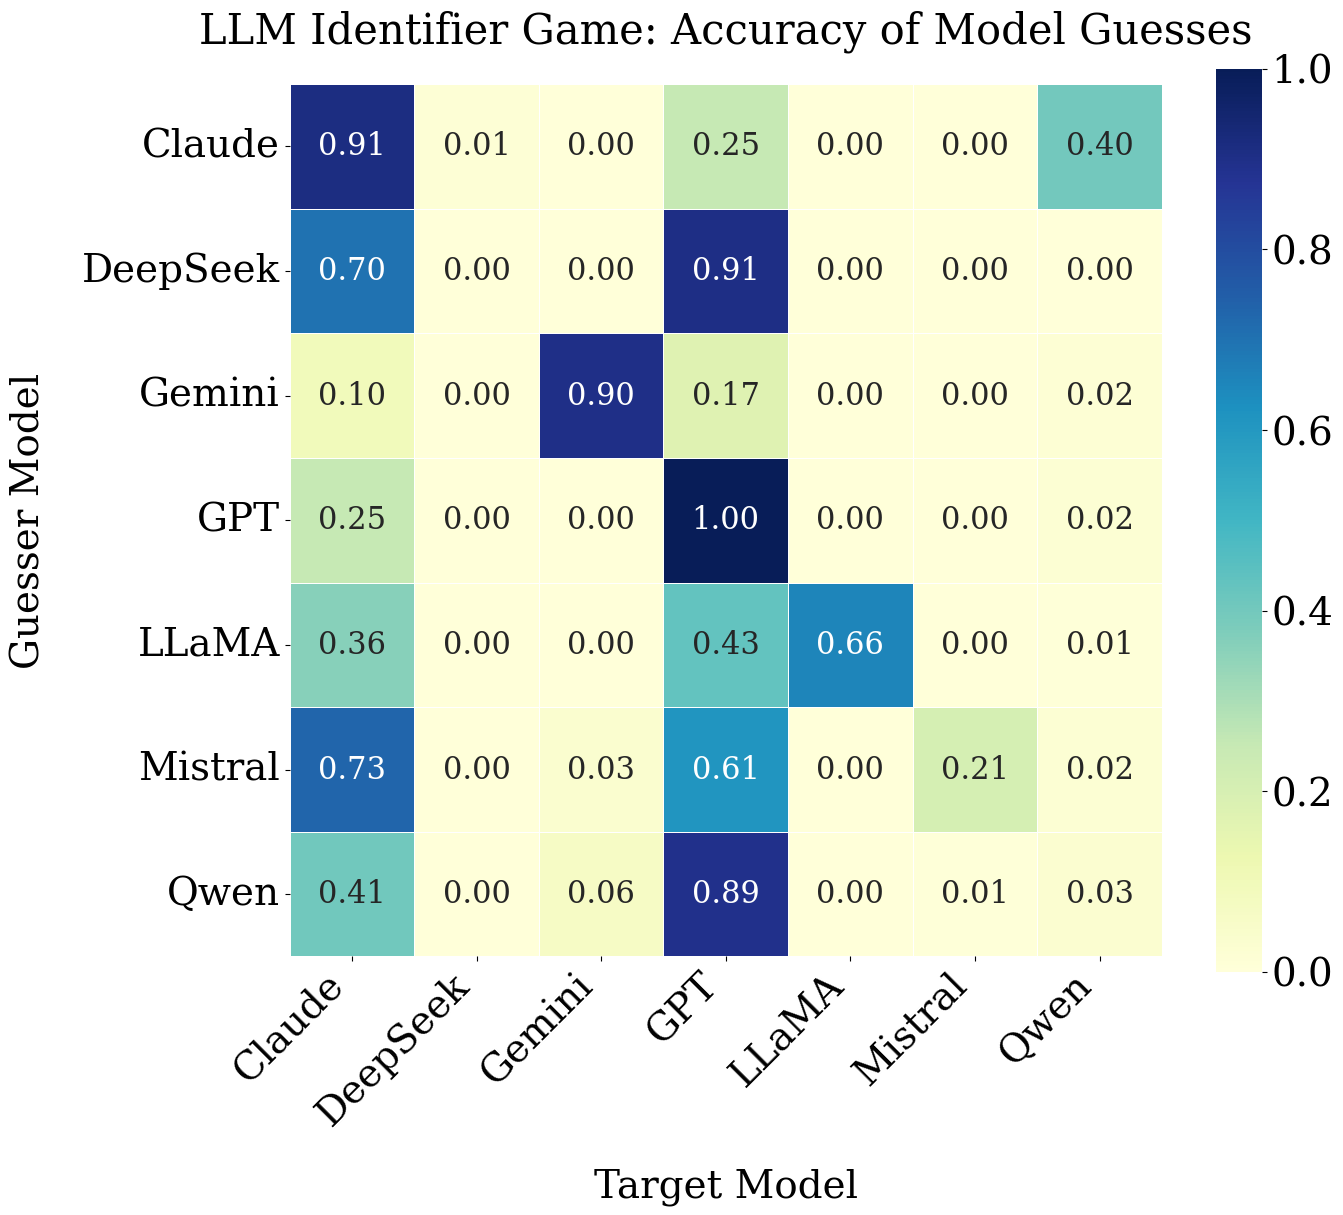

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Use serif font
matplotlib.rcParams.update({"font.family": "serif"})

# Generate heatmap
plt.figure(figsize=(14, 12))

ax = sns.heatmap(
    accuracy_df.astype(float),
    annot=True,
    fmt=".2f",
    cmap='YlGnBu',
    linewidths=0.5,
    square=True,
    vmin=0,
    vmax=1,
    annot_kws={"fontsize": 22}
)

# Titles and axis labels
plt.title("LLM Identifier Game: Accuracy of Model Guesses", fontsize=30, pad=30)
plt.xlabel("Target Model", fontsize=28, labelpad=25)
plt.ylabel("Guesser Model", fontsize=28, labelpad=25)

# Custom pretty labels
pretty_names = {
    "gpt": "GPT",
    "llama": "LLaMA",
    "mistral": "Mistral",
    "claude": "Claude",
    "qwen": "Qwen",
    "gemini": "Gemini",
    "deepseek": "DeepSeek"
}

# Apply pretty labels to ticks
x_labels = [pretty_names.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()]
y_labels = [pretty_names.get(label.get_text(), label.get_text()) for label in ax.get_yticklabels()]

ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=28)
ax.set_yticklabels(y_labels, rotation=0, fontsize=28)

# Colorbar font size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=28)

# Save high-res output
plt.tight_layout()
plt.savefig("4.1.2.eps", dpi=300, bbox_inches='tight')
plt.savefig("4.1.2.pdf", dpi=300, bbox_inches='tight')
plt.show()
